In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gpplot as gpp
gpp.set_aesthetics(context = 'paper')

In [49]:
#read in tiling data with nonessential genes still included
inhouse_tiling = pd.read_csv('../../Data/primaryLibrary/inHouseDatasetsCombined.csv')
inhouse_tiling

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.153200,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982
1,COPS3,Essential,17281246.0,AAAAAAAAAGCCGTGTGAGC,AAAAAAAAAAAAAGCCGTGTGAGCTGGCGG,-0.235500,825.0,-0.268908,-1.270512,0.121195,-0.181286,-0.221117,-1.178776,-0.085464,-0.929032
2,RSRC2,Essential,122526936.0,AAAAAAAAAGGCACTCCCTG,CTGGAAAAAAAAAGGCACTCCCTGCGGCTC,-0.009779,288.0,-0.024939,-0.620540,0.690920,1.202169,-0.094539,-0.872359,0.115417,-0.399721
3,ADSL,Essential,40346501.0,AAAAAAAAAGGCCTGCCTTT,AAAAAAAAAAAAAGGCCTGCCTTTCGGGTT,-0.813600,-391.0,-0.105666,-0.835607,0.616970,1.022597,0.070252,-0.473439,0.565959,0.787431
4,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.235500,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106847,SNRPF,Essential,95858953.0,TTTGTTTGAATCCGGGCCTG,TCTCTTTGTTTGAATCCGGGCCTGGGGTAT,-0.377600,355.0,0.825718,1.645745,0.113422,-0.200161,-0.056957,-0.781384,-0.000611,-0.705450
106848,WFDC11,Non-essential,45670239.0,TTTGTTTGACTCACTTTATT,AATATTTGTTTGACTCACTTTATTAGGGTG,-1.326000,881.0,0.134252,-0.196429,0.454736,0.628647,0.132334,-0.323153,0.491921,0.592344
106849,INS,Non-essential,2161209.0,TTTGTTTGAGGGGCGAGTGG,GGCATTTGTTTGAGGGGCGAGTGGAGGGAG,0.077080,683.0,-0.723737,-2.482246,-0.137196,-0.808734,0.133119,-0.321252,0.263745,-0.008886
106850,ZSWIM2,Non-essential,186849170.0,TTTGTTTGGTGCATTTGAGT,GATTTTTGTTTGGTGCATTTGAGTCGGTGA,-0.304900,996.0,-0.081132,-0.770247,-0.017410,-0.517859,-0.145345,-0.995350,0.345935,0.207680


In [50]:
#calculate average z-score across 4 screens
inhouse_tiling['avg_zscore'] = inhouse_tiling[['z_scored_avg_lfc_A549_Zim3',
                                               'z_scored_avg_lfc_A549_Kox1',
                                               'z_scored_avg_lfc_HCT116_Zim3',
                                               'z_scored_avg_lfc_HCT116_Kox1']].mean(axis=1)
inhouse_tiling

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.153200,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,-0.857051
1,COPS3,Essential,17281246.0,AAAAAAAAAGCCGTGTGAGC,AAAAAAAAAAAAAGCCGTGTGAGCTGGCGG,-0.235500,825.0,-0.268908,-1.270512,0.121195,-0.181286,-0.221117,-1.178776,-0.085464,-0.929032,-0.889901
2,RSRC2,Essential,122526936.0,AAAAAAAAAGGCACTCCCTG,CTGGAAAAAAAAAGGCACTCCCTGCGGCTC,-0.009779,288.0,-0.024939,-0.620540,0.690920,1.202169,-0.094539,-0.872359,0.115417,-0.399721,-0.172613
3,ADSL,Essential,40346501.0,AAAAAAAAAGGCCTGCCTTT,AAAAAAAAAAAAAGGCCTGCCTTTCGGGTT,-0.813600,-391.0,-0.105666,-0.835607,0.616970,1.022597,0.070252,-0.473439,0.565959,0.787431,0.125245
4,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.235500,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,-0.863904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106847,SNRPF,Essential,95858953.0,TTTGTTTGAATCCGGGCCTG,TCTCTTTGTTTGAATCCGGGCCTGGGGTAT,-0.377600,355.0,0.825718,1.645745,0.113422,-0.200161,-0.056957,-0.781384,-0.000611,-0.705450,-0.010313
106848,WFDC11,Non-essential,45670239.0,TTTGTTTGACTCACTTTATT,AATATTTGTTTGACTCACTTTATTAGGGTG,-1.326000,881.0,0.134252,-0.196429,0.454736,0.628647,0.132334,-0.323153,0.491921,0.592344,0.175352
106849,INS,Non-essential,2161209.0,TTTGTTTGAGGGGCGAGTGG,GGCATTTGTTTGAGGGGCGAGTGGAGGGAG,0.077080,683.0,-0.723737,-2.482246,-0.137196,-0.808734,0.133119,-0.321252,0.263745,-0.008886,-0.905280
106850,ZSWIM2,Non-essential,186849170.0,TTTGTTTGGTGCATTTGAGT,GATTTTTGTTTGGTGCATTTGAGTCGGTGA,-0.304900,996.0,-0.081132,-0.770247,-0.017410,-0.517859,-0.145345,-0.995350,0.345935,0.207680,-0.518944


In [51]:
inhouse_tiling['Category'].value_counts()

Essential              59553
Non-essential          45316
ONE_INTERGENICO_CTL     1983
Name: Category, dtype: int64

In [52]:
noness_df = inhouse_tiling[inhouse_tiling['Category'] == 'Non-essential'].copy()
noness_df

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.15320,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,-0.857051
4,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.23550,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,-0.863904
8,TFAP2D,Non-essential,50713527.0,AAAAAAAAGTAATAATACCT,AAAAAAAAAAAAGTAATAATACCTCGGCAT,-0.02809,569.0,-0.497395,-1.879237,-0.353961,-1.335102,-0.289641,-1.344658,-0.109469,-0.992285,-1.387821
9,IL22,Non-essential,68253604.0,AAAAAAAAGTCAGTATCCTG,AATTAAAAAAAAGTCAGTATCCTGGGGGCT,-0.15350,-39.0,0.410484,0.539497,0.152376,-0.105570,-0.168406,-1.051176,0.264744,-0.006253,-0.155875
13,APOBEC1,Non-essential,7665908.0,AAAAAAAATTTGGTTAGGCA,AAAAAAAAAAAATTTGGTTAGGCATGGTGG,-1.46100,980.0,-0.055772,-0.702684,0.149273,-0.113104,0.335288,0.168153,0.074993,-0.506237,-0.288468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106844,H2AC1,Non-essential,25726562.0,TTTGTTTACTTGGCGAGACT,TCTGTTTGTTTACTTGGCGAGACTTGGAGC,-0.92080,-232.0,-0.221652,-1.144614,0.085180,-0.268742,0.005672,-0.629771,0.005074,-0.690469,-0.683399
106848,WFDC11,Non-essential,45670239.0,TTTGTTTGACTCACTTTATT,AATATTTGTTTGACTCACTTTATTAGGGTG,-1.32600,881.0,0.134252,-0.196429,0.454736,0.628647,0.132334,-0.323153,0.491921,0.592344,0.175352
106849,INS,Non-essential,2161209.0,TTTGTTTGAGGGGCGAGTGG,GGCATTTGTTTGAGGGGCGAGTGGAGGGAG,0.07708,683.0,-0.723737,-2.482246,-0.137196,-0.808734,0.133119,-0.321252,0.263745,-0.008886,-0.905280
106850,ZSWIM2,Non-essential,186849170.0,TTTGTTTGGTGCATTTGAGT,GATTTTTGTTTGGTGCATTTGAGTCGGTGA,-0.30490,996.0,-0.081132,-0.770247,-0.017410,-0.517859,-0.145345,-0.995350,0.345935,0.207680,-0.518944


In [53]:
#remove genes that overlap with other genes
overlapping_genes = pd.read_csv('../../Data/geneOverlap/GW_ensembl_protein_coding_df_1kb.csv')
overlapping_gene_2_3 =overlapping_genes[overlapping_genes['overlap type'].isin([2,3])]
gene_2_3_unique = set(list(overlapping_gene_2_3['Selected Gene name']) +\
list(overlapping_gene_2_3['Overlapping Gene name']))
noness_nonoverlapping = noness_df[~noness_df['Target Gene Symbol'].isin(gene_2_3_unique)].copy()
noness_nonoverlapping

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.15320,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,-0.857051
4,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.23550,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,-0.863904
8,TFAP2D,Non-essential,50713527.0,AAAAAAAAGTAATAATACCT,AAAAAAAAAAAAGTAATAATACCTCGGCAT,-0.02809,569.0,-0.497395,-1.879237,-0.353961,-1.335102,-0.289641,-1.344658,-0.109469,-0.992285,-1.387821
9,IL22,Non-essential,68253604.0,AAAAAAAAGTCAGTATCCTG,AATTAAAAAAAAGTCAGTATCCTGGGGGCT,-0.15350,-39.0,0.410484,0.539497,0.152376,-0.105570,-0.168406,-1.051176,0.264744,-0.006253,-0.155875
13,APOBEC1,Non-essential,7665908.0,AAAAAAAATTTGGTTAGGCA,AAAAAAAAAAAATTTGGTTAGGCATGGTGG,-1.46100,980.0,-0.055772,-0.702684,0.149273,-0.113104,0.335288,0.168153,0.074993,-0.506237,-0.288468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106839,SLCO6A1,Non-essential,102499001.0,TTTGTTGTGGCGAGGGCAGC,GCGGTTTGTTGTGGCGAGGGCAGCTGGGGC,-1.26900,551.0,0.250073,0.112136,-0.032823,-0.555286,0.852581,1.420402,0.397374,0.343219,0.330118
106843,CELA3B,Non-essential,21977023.0,TTTGTTTACTGCCCCCATCA,TGACTTTGTTTACTGCCCCCATCAAGGACT,0.13670,292.0,0.150511,-0.153112,-0.011927,-0.504545,0.284136,0.044325,0.795890,1.393288,0.194989
106848,WFDC11,Non-essential,45670239.0,TTTGTTTGACTCACTTTATT,AATATTTGTTTGACTCACTTTATTAGGGTG,-1.32600,881.0,0.134252,-0.196429,0.454736,0.628647,0.132334,-0.323153,0.491921,0.592344,0.175352
106850,ZSWIM2,Non-essential,186849170.0,TTTGTTTGGTGCATTTGAGT,GATTTTTGTTTGGTGCATTTGAGTCGGTGA,-0.30490,996.0,-0.081132,-0.770247,-0.017410,-0.517859,-0.145345,-0.995350,0.345935,0.207680,-0.518944


<Axes: >

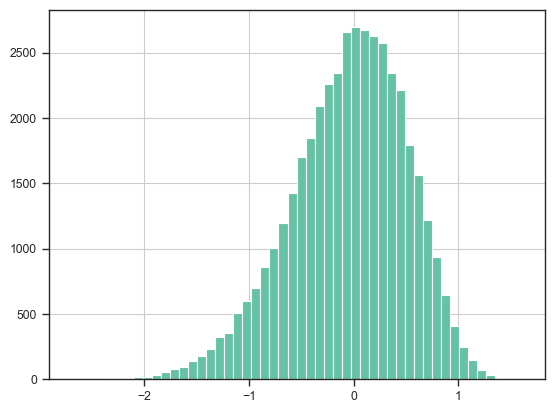

In [54]:
noness_nonoverlapping['On-Target Efficacy Score'].hist(bins=50)

In [55]:
#remove guides with low RS3 Sequence scores
noness_nonoverlapping_active = noness_nonoverlapping[noness_nonoverlapping['On-Target Efficacy Score'] > -0.5].copy()
noness_nonoverlapping_active

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.15320,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,-0.857051
4,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.23550,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,-0.863904
8,TFAP2D,Non-essential,50713527.0,AAAAAAAAGTAATAATACCT,AAAAAAAAAAAAGTAATAATACCTCGGCAT,-0.02809,569.0,-0.497395,-1.879237,-0.353961,-1.335102,-0.289641,-1.344658,-0.109469,-0.992285,-1.387821
9,IL22,Non-essential,68253604.0,AAAAAAAAGTCAGTATCCTG,AATTAAAAAAAAGTCAGTATCCTGGGGGCT,-0.15350,-39.0,0.410484,0.539497,0.152376,-0.105570,-0.168406,-1.051176,0.264744,-0.006253,-0.155875
14,DEFB126,Non-essential,142591.0,AAAAAAACAAAAGTGAAATG,AGCAAAAAAAACAAAAGTGAAATGAGGCAG,0.14820,410.0,0.231700,0.063188,-0.041797,-0.577077,-0.334828,-1.454046,-0.050205,-0.836125,-0.701015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106837,GPR101,Non-essential,137033995.0,TTTGTTGTATATCAGGACTG,GGTATTTGTTGTATATCAGGACTGAGGAGG,0.02719,-831.0,0.304589,0.257375,0.506942,0.755418,0.034570,-0.559817,0.243164,-0.063117,0.097465
106838,KRTAP4-7,Non-essential,41084151.0,TTTGTTGTCAAATAATGTCC,GTCTTTTGTTGTCAAATAATGTCCTGGTCA,-0.19900,-392.0,0.218226,0.027291,0.191171,-0.011365,0.700213,1.051553,-0.018461,-0.752482,0.078749
106843,CELA3B,Non-essential,21977023.0,TTTGTTTACTGCCCCCATCA,TGACTTTGTTTACTGCCCCCATCAAGGACT,0.13670,292.0,0.150511,-0.153112,-0.011927,-0.504545,0.284136,0.044325,0.795890,1.393288,0.194989
106850,ZSWIM2,Non-essential,186849170.0,TTTGTTTGGTGCATTTGAGT,GATTTTTGTTTGGTGCATTTGAGTCGGTGA,-0.30490,996.0,-0.081132,-0.770247,-0.017410,-0.517859,-0.145345,-0.995350,0.345935,0.207680,-0.518944


In [56]:
noness_nonoverlapping_active['gene_avg_zscore'] = noness_nonoverlapping_active.groupby('Target Gene Symbol')['avg_zscore'].transform('mean')
noness_nonoverlapping_active = noness_nonoverlapping_active[noness_nonoverlapping_active['gene_avg_zscore'] > -2].copy()
noness_nonoverlapping_active

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore,gene_avg_zscore
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.15320,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,-0.857051,0.137831
4,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.23550,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,-0.863904,0.003741
8,TFAP2D,Non-essential,50713527.0,AAAAAAAAGTAATAATACCT,AAAAAAAAAAAAGTAATAATACCTCGGCAT,-0.02809,569.0,-0.497395,-1.879237,-0.353961,-1.335102,-0.289641,-1.344658,-0.109469,-0.992285,-1.387821,-0.157635
9,IL22,Non-essential,68253604.0,AAAAAAAAGTCAGTATCCTG,AATTAAAAAAAAGTCAGTATCCTGGGGGCT,-0.15350,-39.0,0.410484,0.539497,0.152376,-0.105570,-0.168406,-1.051176,0.264744,-0.006253,-0.155875,0.051320
14,DEFB126,Non-essential,142591.0,AAAAAAACAAAAGTGAAATG,AGCAAAAAAAACAAAAGTGAAATGAGGCAG,0.14820,410.0,0.231700,0.063188,-0.041797,-0.577077,-0.334828,-1.454046,-0.050205,-0.836125,-0.701015,0.173317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106837,GPR101,Non-essential,137033995.0,TTTGTTGTATATCAGGACTG,GGTATTTGTTGTATATCAGGACTGAGGAGG,0.02719,-831.0,0.304589,0.257375,0.506942,0.755418,0.034570,-0.559817,0.243164,-0.063117,0.097465,-0.450507
106838,KRTAP4-7,Non-essential,41084151.0,TTTGTTGTCAAATAATGTCC,GTCTTTTGTTGTCAAATAATGTCCTGGTCA,-0.19900,-392.0,0.218226,0.027291,0.191171,-0.011365,0.700213,1.051553,-0.018461,-0.752482,0.078749,0.269162
106843,CELA3B,Non-essential,21977023.0,TTTGTTTACTGCCCCCATCA,TGACTTTGTTTACTGCCCCCATCAAGGACT,0.13670,292.0,0.150511,-0.153112,-0.011927,-0.504545,0.284136,0.044325,0.795890,1.393288,0.194989,-0.029346
106850,ZSWIM2,Non-essential,186849170.0,TTTGTTTGGTGCATTTGAGT,GATTTTTGTTTGGTGCATTTGAGTCGGTGA,-0.30490,996.0,-0.081132,-0.770247,-0.017410,-0.517859,-0.145345,-0.995350,0.345935,0.207680,-0.518944,-0.067768


There weren't any genes with an average z-score below -2.

In [57]:
intergenics = inhouse_tiling[inhouse_tiling['Target Gene Symbol'].str.contains('ONE_INTERGENIC')].copy()
intergenics

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore
281,ONE_INTERGENIC_426,ONE_INTERGENICO_CTL,NaN,AAAACGCTAATCACGATGCT,NaN,NaN,NaN,-0.013008,-0.588752,0.229716,0.082235,0.231060,-0.084159,-0.232759,-1.317147,-0.476956
307,ONE_INTERGENIC_590,ONE_INTERGENICO_CTL,NaN,AAAACTGTCCCTATTAATCC,NaN,NaN,NaN,-0.166827,-0.998552,0.328130,0.321210,0.174184,-0.221843,0.298881,0.083695,-0.203873
449,ONE_INTERGENIC_918,ONE_INTERGENICO_CTL,NaN,AAAAGTGTGACATAGGTCGT,NaN,NaN,NaN,0.259368,0.136900,-0.187414,-0.930678,0.362097,0.233052,-0.060833,-0.864131,-0.356214
491,ONE_INTERGENIC_837,ONE_INTERGENICO_CTL,NaN,AAAATATCCATTCGATTACC,NaN,NaN,NaN,0.252534,0.118693,-0.105104,-0.730806,-0.468201,-1.776910,-0.218490,-1.279547,-0.917142
492,ONE_INTERGENIC_825,ONE_INTERGENICO_CTL,NaN,AAAATATCCTCCATGCGTGA,NaN,NaN,NaN,0.905561,1.858460,-0.213991,-0.995214,0.912623,1.565749,0.444730,0.467999,0.724248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106475,ONE_INTERGENIC_874,ONE_INTERGENICO_CTL,NaN,TTTGATCTGTAGCAGATGAC,NaN,NaN,NaN,0.323391,0.307466,0.545505,0.849061,0.104767,-0.389885,0.512509,0.646595,0.353309
106584,ONE_INTERGENIC_70,ONE_INTERGENICO_CTL,NaN,TTTGGAATTATCATCGTCGT,NaN,NaN,NaN,0.214765,0.018071,0.267283,0.173456,0.450597,0.447290,0.472803,0.541969,0.295197
106597,ONE_INTERGENIC_108,ONE_INTERGENICO_CTL,NaN,TTTGGAGTGATATTCGAACA,NaN,NaN,NaN,0.353744,0.388331,-0.581978,-1.888791,0.423880,0.382615,-0.002250,-0.709769,-0.456903
106611,ONE_INTERGENIC_33,ONE_INTERGENICO_CTL,NaN,TTTGGCAGTCTATTACGGTA,NaN,NaN,NaN,0.103618,-0.278042,0.155628,-0.097672,-0.150519,-1.007875,0.194114,-0.192360,-0.393987


RS3 Sequence scores are not included in the CRISPick output for negative controls, but when intergenics are generated it is ensured that they have a minimum RS3 Sequence score of 1.0, so we can be confident that they have propensity for activity.

In [58]:
noness_intergenic_df = pd.concat([noness_nonoverlapping_active,intergenics]).reset_index(drop=True)
noness_intergenic_df

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore,gene_avg_zscore
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.15320,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,-0.857051,0.137831
1,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.23550,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,-0.863904,0.003741
2,TFAP2D,Non-essential,50713527.0,AAAAAAAAGTAATAATACCT,AAAAAAAAAAAAGTAATAATACCTCGGCAT,-0.02809,569.0,-0.497395,-1.879237,-0.353961,-1.335102,-0.289641,-1.344658,-0.109469,-0.992285,-1.387821,-0.157635
3,IL22,Non-essential,68253604.0,AAAAAAAAGTCAGTATCCTG,AATTAAAAAAAAGTCAGTATCCTGGGGGCT,-0.15350,-39.0,0.410484,0.539497,0.152376,-0.105570,-0.168406,-1.051176,0.264744,-0.006253,-0.155875,0.051320
4,DEFB126,Non-essential,142591.0,AAAAAAACAAAAGTGAAATG,AGCAAAAAAAACAAAAGTGAAATGAGGCAG,0.14820,410.0,0.231700,0.063188,-0.041797,-0.577077,-0.334828,-1.454046,-0.050205,-0.836125,-0.701015,0.173317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35264,ONE_INTERGENIC_874,ONE_INTERGENICO_CTL,NaN,TTTGATCTGTAGCAGATGAC,NaN,NaN,NaN,0.323391,0.307466,0.545505,0.849061,0.104767,-0.389885,0.512509,0.646595,0.353309,NaN
35265,ONE_INTERGENIC_70,ONE_INTERGENICO_CTL,NaN,TTTGGAATTATCATCGTCGT,NaN,NaN,NaN,0.214765,0.018071,0.267283,0.173456,0.450597,0.447290,0.472803,0.541969,0.295197,NaN
35266,ONE_INTERGENIC_108,ONE_INTERGENICO_CTL,NaN,TTTGGAGTGATATTCGAACA,NaN,NaN,NaN,0.353744,0.388331,-0.581978,-1.888791,0.423880,0.382615,-0.002250,-0.709769,-0.456903,NaN
35267,ONE_INTERGENIC_33,ONE_INTERGENICO_CTL,NaN,TTTGGCAGTCTATTACGGTA,NaN,NaN,NaN,0.103618,-0.278042,0.155628,-0.097672,-0.150519,-1.007875,0.194114,-0.192360,-0.393987,NaN


In [78]:
#plot histogram of promiscuous/nonpromiscuous labels
noness_intergenic_df[''] = 'excluded'
noness_intergenic_df.loc[noness_intergenic_df['avg_zscore'] < -3,''] = 'promiscuous'
noness_intergenic_df.loc[noness_intergenic_df['avg_zscore'] > -1,''] = 'nonpromiscuous'
noness_intergenic_df[''].value_counts()

nonpromiscuous    31754
excluded           2038
promiscuous        1477
Name: , dtype: int64

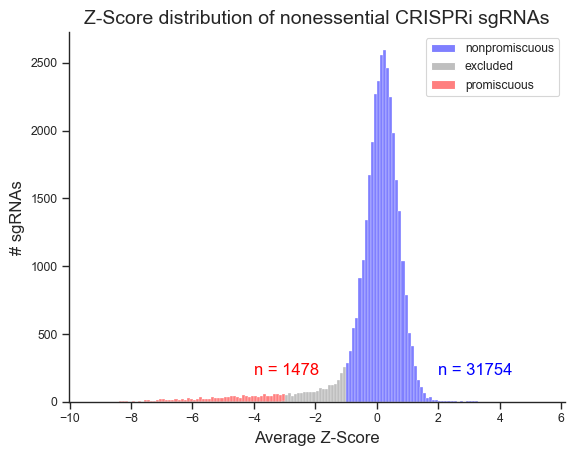

In [79]:
color_map = {'promiscuous':'red','nonpromiscuous':'blue','excluded':'gray'}
ax = sns.histplot(data=noness_intergenic_df, x='avg_zscore', hue='', palette=color_map, binwidth = 0.1)

plt.xlabel('Average Z-Score',fontsize=12)
plt.ylabel('# sgRNAs',fontsize=12)
plt.title('Z-Score distribution of nonessential CRISPRi sgRNAs',fontsize=14)

plt.text(-4,200,'n = 1478',fontsize=12,color='red')
plt.text(2,200,'n = 31754',fontsize=12,color='blue')

sns.despine()

gpp.savefig("../../Figures/Figure 5/promiscuous_nonpromiscuous_labeled_histogram.pdf",dpi=300, bbox_inches = 'tight')

In [80]:
#remove excluded guides
promiscuous_nonpromiscuous_df = noness_intergenic_df[noness_intergenic_df[''] != 'excluded'].copy()
promiscuous_nonpromiscuous_df['promiscuous'] = promiscuous_nonpromiscuous_df[''] == 'promiscuous'
promiscuous_nonpromiscuous_df

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore,gene_avg_zscore,,label,promiscuous
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.1532,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,-0.857051,0.137831,nonpromiscuous,nonpromiscuous,False
1,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.2355,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,-0.863904,0.003741,nonpromiscuous,nonpromiscuous,False
3,IL22,Non-essential,68253604.0,AAAAAAAAGTCAGTATCCTG,AATTAAAAAAAAGTCAGTATCCTGGGGGCT,-0.1535,-39.0,0.410484,0.539497,0.152376,-0.105570,-0.168406,-1.051176,0.264744,-0.006253,-0.155875,0.051320,nonpromiscuous,nonpromiscuous,False
4,DEFB126,Non-essential,142591.0,AAAAAAACAAAAGTGAAATG,AGCAAAAAAAACAAAAGTGAAATGAGGCAG,0.1482,410.0,0.231700,0.063188,-0.041797,-0.577077,-0.334828,-1.454046,-0.050205,-0.836125,-0.701015,0.173317,nonpromiscuous,nonpromiscuous,False
5,IL22,Non-essential,68253604.0,AAAAAAAGTCAGTATCCTGG,ATTAAAAAAAAGTCAGTATCCTGGGGGCTA,0.3508,-38.0,0.350938,0.380855,0.009976,-0.451357,0.336373,0.170781,0.782455,1.357887,0.364541,0.051320,nonpromiscuous,nonpromiscuous,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35264,ONE_INTERGENIC_874,ONE_INTERGENICO_CTL,NaN,TTTGATCTGTAGCAGATGAC,NaN,NaN,NaN,0.323391,0.307466,0.545505,0.849061,0.104767,-0.389885,0.512509,0.646595,0.353309,NaN,nonpromiscuous,nonpromiscuous,False
35265,ONE_INTERGENIC_70,ONE_INTERGENICO_CTL,NaN,TTTGGAATTATCATCGTCGT,NaN,NaN,NaN,0.214765,0.018071,0.267283,0.173456,0.450597,0.447290,0.472803,0.541969,0.295197,NaN,nonpromiscuous,nonpromiscuous,False
35266,ONE_INTERGENIC_108,ONE_INTERGENICO_CTL,NaN,TTTGGAGTGATATTCGAACA,NaN,NaN,NaN,0.353744,0.388331,-0.581978,-1.888791,0.423880,0.382615,-0.002250,-0.709769,-0.456903,NaN,nonpromiscuous,nonpromiscuous,False
35267,ONE_INTERGENIC_33,ONE_INTERGENICO_CTL,NaN,TTTGGCAGTCTATTACGGTA,NaN,NaN,NaN,0.103618,-0.278042,0.155628,-0.097672,-0.150519,-1.007875,0.194114,-0.192360,-0.393987,NaN,nonpromiscuous,nonpromiscuous,False


In [82]:
promiscuous_nonpromiscuous_df.to_csv('../../Data/offTargetAnalysis/CleanedOffTargetTiling.csv',index=False)